# Project description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.


# Contents <a id='back'></a>
* [1. Data overview](#intro)

* [2. Data preprocessing](#data_preprocessing)
 
    * Columns: `name` & `genre`
    * Columns: `year_of_release`
    * Columns: `user_score`, `critic_score`, `rating`
    * Check data Types
    * Calculate total sales 
    
* [3. Exploratory Analysis](#exploratory_analysis)

*  [4.Create user profile for each region](#profile)
   
*   [5. Hipothesis](#hipothesis)
*  [6. Conclusions](#conclusions)

# Project info & documentation 

**Step 1. Data Overview**
**Step 2. Prepare the data**
- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
    - Explain why you filled in the missing values as you did or why you decided to leave them blank.
    - Why do you think the values are missing? Give possible reasons.
    - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

**Step 3. Analyze the data**
* 3.1. Look at how many games were released in different years. Is the data for every period significant?
* 3.2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
    * *Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?*
    * *Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.*
* 3.3. Working only with relevant data. Filter df from 2014 and on.
    * *Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.*
* 3.4. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

**Step 4. Create a user profile for each region**
- For each region (NA, EU, JP), determine:
    - The top five platforms. Describe variations in their market shares from region to region.
    - The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

**Step 5. Test the following hypotheses:**
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.

Explain:
- How you formulated the null and alternative hypotheses
- What significance level you chose to test the hypotheses, and why

**Step 6. Write a general conclusion**


In [1]:
# Loading all the libraries
from scipy import stats as st #for probability and statistics calculations
from scipy.stats import levene
import pandas as pd #for dataframe manipulation
pd.set_option('display.max_columns', None)
import datetime as dt
import matplotlib.pyplot as plt #for graph plotting and display
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import numpy as np #for advanced mathematical operations
import nltk #for string/text manipulation
import seaborn as sb
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import math
from IPython.display import display, HTML, Image, YouTubeVideo


In [2]:
try:
    games = pd.read_csv('games.csv') 
    
except:
    games = pd.read_csv('/datasets/games.csv')

## Data overview <a id='intro'></a>

**Description of the data**
- `Name`
- `Platform`
- `Year_of_Release`
- `Genre`
- `NA_sales` (North American sales in USD million)
- `EU_sales` (sales in Europe in USD million)
- `JP_sales` (sales in Japan in USD million)
- `Other_sales` (sales in other countries in USD million)
- `Critic_Score` (maximum of 100)
- `User_Score` (maximum of 10)
- `Rating` (ESRB)

Data for 2016 may be incomplete.



In [3]:
print("Shape of the dataset:", games.shape)
print()
print(games.info())

Shape of the dataset: (16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [4]:
# print a sample of data
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# print the general/summary information about the DataFrame
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# function to calculate the percentage of missing values
def missing_values_table(games):
        # Total missing values
        missing_values = games.isnull().sum()
        
        # Percentage of missing values
        missing_val_percent = 100 * games.isnull().sum() / len(games)
        
        # Make a table with the results
        missing_val_table = pd.concat([missing_values, missing_val_percent], axis=1)
        
        # Rename the columns
        missing_val_table_ren_columns = missing_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        missing_val_table_ren_columns = missing_val_table_ren_columns[
            missing_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(games.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return missing_val_table_ren_columns

In [7]:
#first overview of missing values
missing_values_table(games)

Your selected dataframe has 11 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Critic_Score,8578,51.3
Rating,6766,40.5
User_Score,6701,40.1
Year_of_Release,269,1.6
Name,2,0.0
Genre,2,0.0


In [8]:
#first overview of duplicated values
games.duplicated().sum()

0

In [9]:
games.describe(include = ['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


<span style="color:purple">**Conlcusions:** </span> 

- We have a dataset with missing values in several columns: `year_of_release`,`critic_scrore`, `user_score`, `rating`.
    - We also have 2 single missing values in `name` and `genre`, that we will address accordingly 
    - We will investigate the data to understand better how to fill them when possible
- As first sight, we do not have any duplicates. 
- Most common game is Need for Speed: Most Wanted,
- Most common platform is PS2
- Most common genre is Action
- Most common user score is tbd (to be determined) 
- Most common rating is E.

We also see that we have a lot of games, only 31 platforms, 12 genres, a variety of users scores, and only 8 rating points.
<span style="color:purple">**Next steps:** </span>

- Change column names to lowercase
- Change `Year of release` to intr to remove the decimals
- Change `user score` and the `rating` to float to use the numbers and replace missing values with mean of the total score per game, we will investigate the best way to replace those values. 

## Data Preprocessing <a id='data_preprocessing'></a>



### Change Column names

In [10]:
#convert all columns names to lowercase
games= games.rename(columns=str.lower)

In [11]:
games.sort_values('genre').tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14108,Railroad Tycoon 3,PC,2003.0,Strategy,0.00,0.03,0.00,0.00,80.0,7.7,E
15384,Order of War,PC,2009.0,Strategy,0.00,0.01,0.00,0.00,69.0,7.3,T
11864,Commandos 2: Men of Courage,XB,2002.0,Strategy,0.05,0.02,0.00,0.00,67.0,8.4,T
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


### Treat missing values
<span style="color:purple">**Actions taken:** </span>

- Drop `name` & `genre` rows
- Align `rating` scores and replace NaN with "No Rating" and we will find the way to replace those values with the mean per year and genre



In [12]:
missing_values_table(games)

Your selected dataframe has 11 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
critic_score,8578,51.3
rating,6766,40.5
user_score,6701,40.1
year_of_release,269,1.6
name,2,0.0
genre,2,0.0


#### Columns: `name` & `genre`

- These two rows have both missing values in name and genre, so we will drop them from our dataset, since we can't do much without the name of the game and that is data we cannot replace with other values


In [13]:
games.sort_values('name', ascending=True).tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
9134,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,0.00,0.00,0.14,0.00,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
games = games.dropna(subset=['name', 'genre'])

missing_values_table(games)

Your selected dataframe has 11 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
critic_score,8576,51.3
rating,6764,40.5
user_score,6699,40.1
year_of_release,269,1.6


#### Column: `year_of_release`

In [15]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [16]:
games['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [17]:
games['duplicate_name'] = games.duplicated(
    subset='name', keep=False)

In [18]:
#looking for same games name and the year of release to find relationship
games.query('duplicate_name').sort_values(by='name').sort_values(by='name')[1000:1020]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,duplicate_name
14970,Captain Morgane and the Golden Turtle,PC,2012.0,Adventure,0.00,0.02,0.00,0.00,54.0,6.2,NaN,True
16359,Captain Morgane and the Golden Turtle,Wii,2012.0,Adventure,0.00,0.01,0.00,0.00,NaN,tbd,NaN,True
15225,Captain Morgane and the Golden Turtle,PS3,2012.0,Adventure,0.00,0.02,0.00,0.00,NaN,tbd,NaN,True
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,True
15456,Carmageddon: Max Damage,XOne,2016.0,Action,0.01,0.01,0.00,0.00,52.0,7.1,M,True
15050,Carmen Sandiego: The Secret of the Stolen Drums,XB,2004.0,Action,0.02,0.01,0.00,0.00,53.0,tbd,E,True
12851,Carmen Sandiego: The Secret of the Stolen Drums,PS2,2004.0,Action,0.03,0.02,0.00,0.01,53.0,tbd,E,True
15310,Carmen Sandiego: The Secret of the Stolen Drums,GC,2004.0,Action,0.02,0.00,0.00,0.00,57.0,tbd,E,True
840,Carnival Games,DS,2008.0,Misc,1.21,0.63,0.00,0.19,48.0,3.3,E,True
294,Carnival Games,Wii,2007.0,Misc,2.12,1.47,0.05,0.42,56.0,6,E,True


In [19]:
#fill missing values in year_of_release
dict_name_and_year = dict(zip(games.dropna().name,games.dropna().year_of_release))
games['year_of_release'] = games['year_of_release'].fillna(games['name'].map(dict_name_and_year))
missing_values_table(games)

Your selected dataframe has 12 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
critic_score,8576,51.3
rating,6764,40.5
user_score,6699,40.1
year_of_release,167,1.0


We see many duplicated names games and the release year is the same across platforms, so we will use the name and the platform to fill missing values in year_of_release. After doing so, only 1% of our data have missing values on year

We will leave 0 for the rest that we coudln't fill to not interfiere in data type change. 


In [20]:
#changing missing values with 0 to be able to change the year of release dtype to int. 
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)
missing_values_table(games)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
critic_score,8576,51.3
rating,6764,40.5
user_score,6699,40.1


#### Columns: `user_score`,  `critic_score` & `rating`

In this section we will deal with the missing values in the 3 scores columns:
- `user_score`
- `critic_score`
- `rating`

We have games where the 3 types of scores are missing. Those games were released mostly on old consoles not currently in use. We want to make predictions for the year 2017, so we will keep those values as they are, empty. 


In [21]:
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

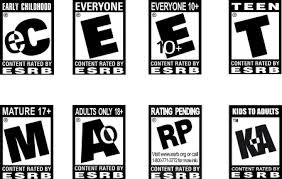

**Explanation:**
Rating name | Years active | Description

1. **Rating Pending (RP)** | 1994–present | 
    * Titles listed as RP (Rating Pending) have been submitted to the ESRB and are awaiting final rating. This symbol appears only in advertising prior to a game's release.
    
    
2. **Everyone (E)** | **1994–1998 (as K-A), 1998–present (as E)** 
    * Titles rated E (Everyone) have content that may be suitable for persons ages 6 and older. Titles in this category may contain minimal cartoon, fantasy or mild violence and/or infrequent use of mild language.. This rating was initially known as Kids to Adults (K-A) until 1998; the ESRB had initially intended to use "E" for the rating, but there were trademark issues with another company over use of an "E" icon
    
    
3. **Everyone 10+ (E10+)** | 2005–present | 
    * Titles rated E10+ (Everyone 10+) have content that may be suitable for ages 10 and older. Titles in this category may contain more cartoon, fantasy or mild violence, mild language, and/or minimal suggestive themes.
   
   
4. **Teen (T)** | 1994–present | 
    * Titles rated T (Teen) have content that may be suitable for ages 13 and older. Titles in this category may contain violence, suggestive themes, crude humor, minimal blood, simulated gambling, and/or infrequent use of strong language.
    
    
5. **Mature 17+ (M)** | 1994–present | 
    * Titles rated M (Mature) have content that may be suitable for persons ages 17 and older. Titles in this category may contain intense violence, blood and gore, sexual content, and/or strong language.
    
    
6. **Adults Only 18+ (AO)** | 1994–present | 
    * Titles rated AO (Adults Only) have content that should only be played by persons 18 years and older. Titles in this category may include prolonged scenes of intense violence and/or graphic sexual content and nudity. Microsoft does not support AO titles.
    
    
7. **Early Childhood (EC)** | 1994–2018 | 
    * Titles rated EC (Early Childhood) have content that may be suitable for persons ages 3 and older. Contains no material that parents would find inappropriate.

Sources: https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board | https://www.xbox.com/en-US/games/gameratings

In [22]:
games['rating'] = games['rating'].replace('K-A', 'E')

Replacing missing values in rating as "Unknown", since we don't want to drop those lines but we won't fill the missing values either. 

In [23]:
games['rating'] = games['rating'].fillna('unknown')

<span style="color:purple">**Actions taken:** </span>

We replaced K-A rating for E, since as we saw in the explanation above, has the same meaning and E is the rating that is in use currently.

In [24]:
games_rating = games.pivot_table(index =['rating'], values = 'name', aggfunc = 'count')
games_rating

,name
rating,
AO,1
E,3993
E10+,1420
EC,8
M,1563
RP,3
T,2961
unknown,6764


In [25]:
missing_values_table(games)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
critic_score,8576,51.3
user_score,6699,40.1


##### `user_score` & `critic_score`

<span style="color:purple">**Actions taken:** </span>


In [26]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [27]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

Replacing 'tbd' scores with NaN, as we do not have those values anyway. 


In [28]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [29]:
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [30]:
games[games['critic_score'].isna()].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,duplicate_name
4132,Karate,2600,0,Fighting,0.44,0.03,0.00,0.00,NaN,NaN,unknown,False
16059,Dance! It's Your Stage,Wii,0,Misc,0.00,0.01,0.00,0.00,NaN,NaN,unknown,True
15081,Wii de Asobu: Metroid Prime,Wii,0,Shooter,0.00,0.00,0.02,0.00,NaN,NaN,unknown,False
5642,Dragster,2600,0,Racing,0.30,0.02,0.00,0.00,NaN,NaN,unknown,False
13874,Luxor: Pharaoh's Challenge,Wii,0,Puzzle,0.01,0.02,0.00,0.00,NaN,NaN,E,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16403,Dynasty Warriors: Eiketsuden,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,True
8566,Lego Star Wars: The Force Awakens,PS3,2016,Action,0.04,0.10,0.00,0.03,NaN,NaN,E10+,True
11414,Guilty Gear Xrd -Revelator-,PS4,2016,Fighting,0.03,0.00,0.05,0.01,NaN,NaN,unknown,True
11578,UEFA Euro 2016,PS3,2016,Sports,0.00,0.04,0.03,0.01,NaN,NaN,unknown,True


<span style="color:orange">**Conlcusions:** </span> 

- `user_score` & `critic_score` have a similar pattern
- Missing values on those columns are within old games and/or with low sales
    - The reason for this might be that on old games (before 1994) ESBR rating did not exist.
    - Another possible explanation might be that games with lower sales did not get rated, as very few users bought them 
    
- I won't fill those missing values as we can't have reliable info to do so. 

In [31]:
missing_values_table(games)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
user_score,9123,54.6
critic_score,8576,51.3


### Check Data Types

<span style="color:purple">**Actions taken:** </span>

In [32]:
games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
duplicate_name        bool
dtype: object

### Calculate total sales per game and region in new column 
<span style="color:purple">**Actions taken:** </span>

In [33]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [34]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,duplicate_name,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,False,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,True,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,False,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,False,31.38


## Exploratory Analysis


### Look at how many games were released in different years. Is the data for every period significant?


In [35]:
games_years = games[['year_of_release', 'name']]
games_years_clean = games_years[games_years['year_of_release'] != 0]
games_years_count = games_years_clean.groupby('year_of_release').count().sort_values(
by = 'year_of_release').reset_index()
games_years_count.sort_values('name', ascending=False).head(10)

,year_of_release,name
28,2008,1440
29,2009,1430
30,2010,1266
27,2007,1201
31,2011,1144
26,2006,1019
25,2005,948
22,2002,845
23,2003,784
24,2004,764


We will plot a chart to see the distribution of games released per year: 

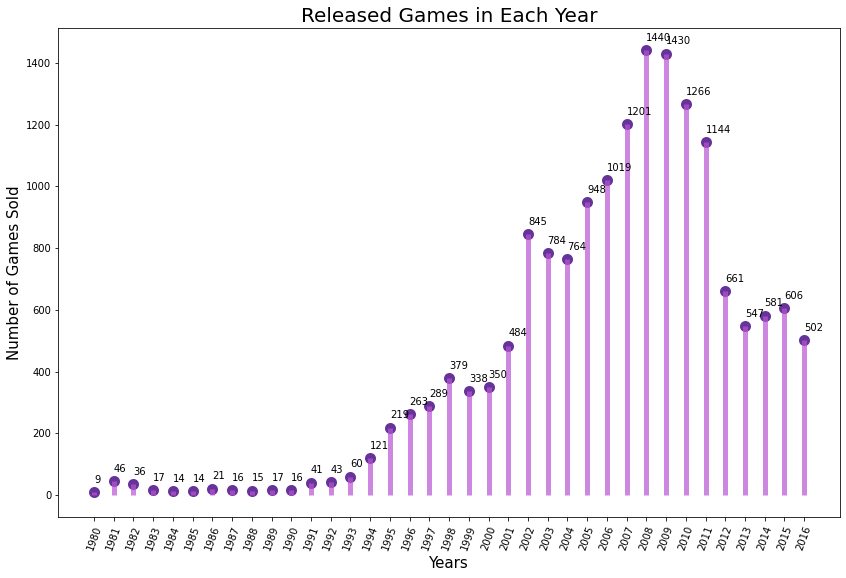

In [36]:
fig, ax = plt.subplots(figsize = (14,9))

ax.vlines(x= games_years_count['year_of_release'], ymin= 0, ymax= games_years_count['name'],
         color= 'mediumorchid', alpha= 0.7, linewidth= 5)

ax.scatter(x= games_years_count['year_of_release'], y =games_years_count['name'],
          color= 'rebeccapurple', alpha= 1, linewidth= 5)

ax.set_title('Released Games in Each Year', fontdict= {'size':20})
ax.set_ylabel('Number of Games Sold', fontdict= {'size':15})
ax.set_xlabel('Years',fontdict= {'size':15})
ax.set_xticks(games_years_count['year_of_release'])

ax.set_xticklabels(games_years_count['year_of_release'], rotation= 70)

for row in games_years_count.itertuples():
    ax.text(row.year_of_release, row.name+30,
             s= round(row.name, 2));

<span style="color:orange">**Conlcusions:** </span> 
- 2009 is the year with the highest amount of games released, very close is 2008
- Not all the data is relevant, as very few games were released during the period 1980-1993, comparing with more recent years
- From 1994 the numbers start to increase, getting to the peak between 2008-2009
- Since we want to predict sales for 2017, we will consider the sata from year 2014, to avoid the peak years before that might affect our conclusions. Go too far back in time makes no sense, as games change & improve pretty fast. Three years time is the appropiate amount of years to create a good prediction


### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

- *Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?*
- *Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.*


In [37]:
platform_total_sales = games[['platform','total_sales']]
grouped_platform_sales = platform_total_sales.groupby('platform').sum().sort_values(
by='total_sales').reset_index()
grouped_platform_sales.sort_values('total_sales', ascending=False).head()

,platform,total_sales
30,PS2,1255.77
29,X360,971.42
28,PS3,939.65
27,Wii,907.51
26,DS,806.12


In [38]:
grouped_platform_sales.sort_values('total_sales', ascending=False).tail()

,platform,total_sales
4,WS,1.42
3,TG16,0.16
2,3DO,0.10
1,GG,0.04
0,PCFX,0.03


We want to understand the deviation of the sales values per platform. We will use **z-score**
> The z-score is a score that measures how many standard deviations a data point is away from the mean. The z-score allows us to determine how usual or unusual a data point is in a distribution. The z-score allows us more easily compare datapoints for a record across features, especially when the different features have significantly different ranges.

In [39]:
grouped_platform_sales['z_score']= (
    grouped_platform_sales['total_sales'] - grouped_platform_sales['total_sales'].mean())/grouped_platform_sales['total_sales'].std()
grouped_platform_sales.sort_values('z_score', ascending=False).head()

,platform,total_sales,z_score
30,PS2,1255.77,2.780554
29,X360,971.42,1.963972
28,PS3,939.65,1.872737
27,Wii,907.51,1.780439
26,DS,806.12,1.489273


In [40]:
grouped_platform_sales['z_score_color']= ['red' if x<0 else 'green' for x in grouped_platform_sales.z_score]
grouped_platform_sales.sort_values('z_score', ascending=False).tail()

,platform,total_sales,z_score,z_score_color
4,WS,1.42,-0.821623,red
3,TG16,0.16,-0.825241,red
2,3DO,0.10,-0.825413,red
1,GG,0.04,-0.825586,red
0,PCFX,0.03,-0.825614,red


- <span style="color:green">**Positive z-score</span>** = total sales are above the average
- <span style="color:red">Negative z-score</span> = total sales are beneath the average

Added a color column to see the distribution of total_sales per platform more clear:

- <span style="color:green">Green</span> = positive z_scores 
- <span style="color:red">Red</span> = for the negative z_scores

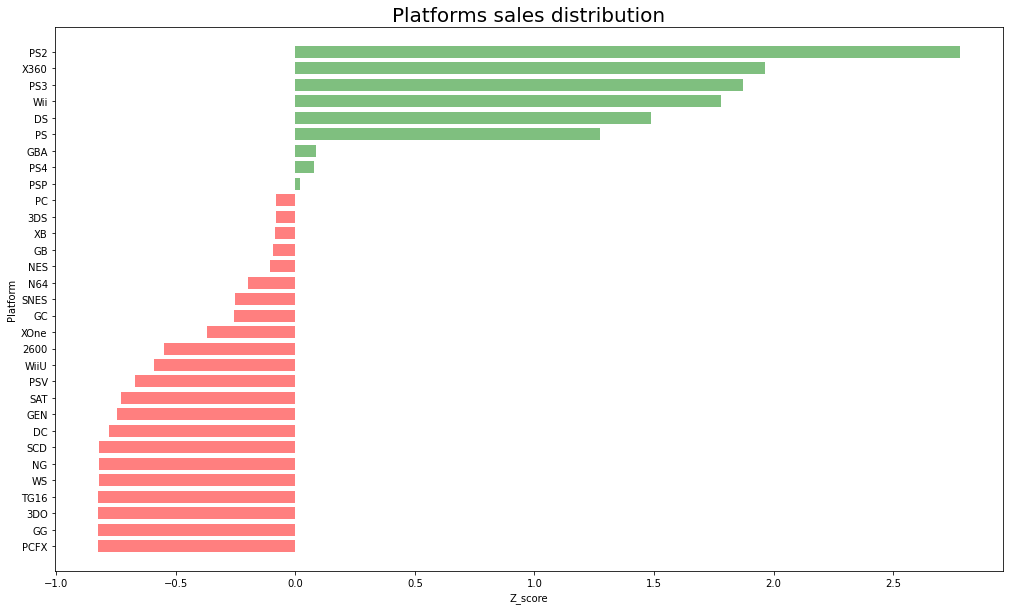

In [41]:
fig, ax = plt.subplots(figsize = (17,10))

ax.set_title('Platforms sales distribution', fontdict= {'size':20})
ax.set_ylabel('Platform')
ax.set_xlabel('Z_score')

plt.hlines(y= grouped_platform_sales['platform'], xmax = grouped_platform_sales['z_score'], 
          xmin= 0, color=grouped_platform_sales['z_score_color'], alpha= 0.5, linewidth= 12)
plt.show();

<span style="color:orange">**Conlcusions:** </span> 
- The most successful platforms with slaes very over the average are: "PS2","X360","PS3","Wii","DS","PS".


<span style="color:purple">**Next steps:** </span>
- Create two separate dataframes containing: 
    * Sales per year per platforms of all platforms = 'year_platform_sales'
    * Sales per year per platform of only top platforms = 'top_platform_sales'

In [42]:
year_platform_sales = games[['year_of_release','platform', 'total_sales']]
year_platform_sales_clean = games[games['year_of_release'] != 0]
year_platform_sales = year_platform_sales_clean.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
year_platform_sales.sort_values('total_sales', ascending=False).head(10)

,platform,year_of_release,total_sales
136,PS2,2004,211.81
134,PS2,2002,208.36
203,Wii,2009,206.97
135,PS2,2003,193.05
202,Wii,2008,177.68
221,X360,2010,170.55
126,PS,1998,169.49
133,PS2,2001,166.43
137,PS2,2005,160.91
150,PS3,2011,157.84


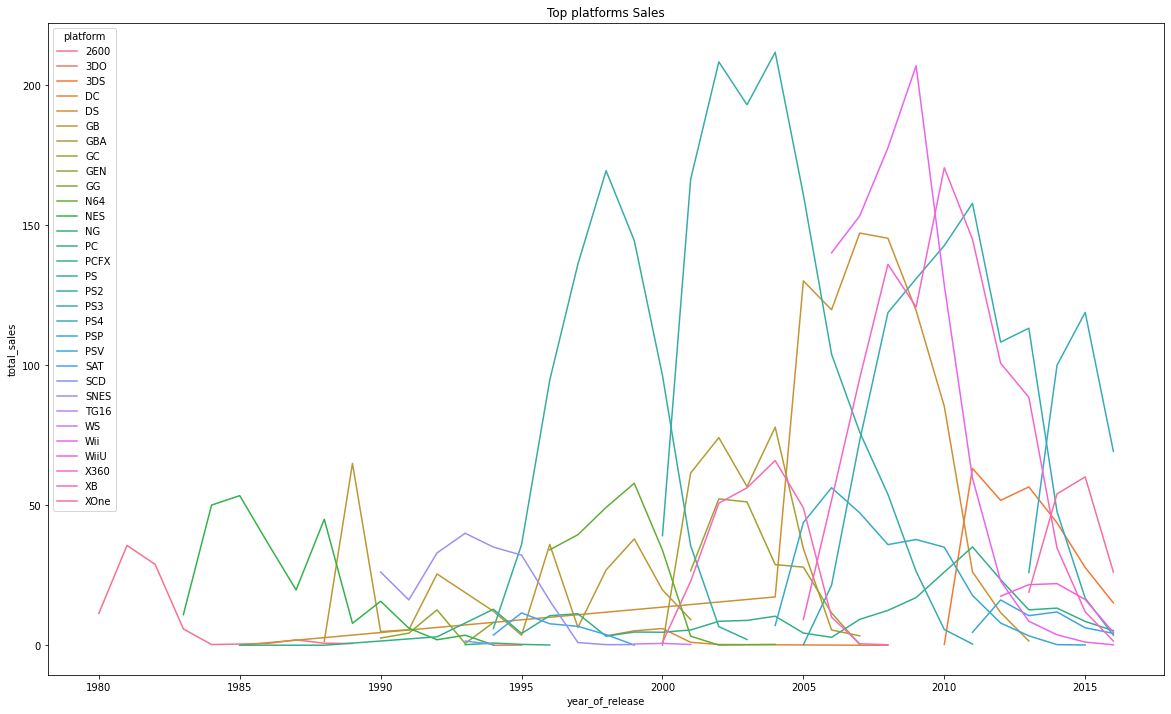

In [43]:
plt.figure(figsize=(20,12))
ax = sb.lineplot(
    data=year_platform_sales, 
    x = 'year_of_release',
    y = 'total_sales',
    hue = 'platform').set(title='Top platforms Sales')

In [44]:
platforms_lifeyears = games.groupby(['platform']).agg({'year_of_release':['min', 'max'], 'total_sales':'sum'}).droplevel(0, axis=1).reset_index()
platforms_lifeyears['life_years'] = platforms_lifeyears['max'] - platforms_lifeyears['min']
platforms_lifeyears.columns = ['platform', 'start_sales', 'end_sales', 'total_sales', 'life_years']
platforms_lifeyears = platforms_lifeyears.sort_values(by= 'total_sales', ascending=False)
platforms_lifeyears = platforms_lifeyears[platforms_lifeyears['start_sales'] != 0]


In [45]:
platforms_lifeyears.sort_values('life_years', ascending=False).head(8)

,platform,start_sales,end_sales,total_sales,life_years
11,NES,1983,1994,251.05,11
3,DC,1998,2008,15.95,10
23,SNES,1990,1999,200.04,9
21,SAT,1994,1999,33.59,5
27,WiiU,2012,2016,82.19,4
8,GEN,1990,1994,28.35,4
18,PS4,2013,2016,314.14,3
30,XOne,2013,2016,159.32,3


<span style="color:orange">**Conlcusions:** </span> 
- Lifetime of platforms is aoround 8-10 years, with some exceptions
- After they were released, it takes around 5 years until they fade away
- DS is being operative leading the top of the table for 28 years, making it the exception to the 8-10 years lifetime

<span style="color:purple">**Next steps:** </span>
- Focus on top platforms on sales lead

In [46]:
top_platform_sales = games.query('platform == ("PS2","X360","PS3","Wii","DS","PS")')
top_platform_sales = top_platform_sales.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
top_platform_sales = top_platform_sales[top_platform_sales['year_of_release'] != 0]
top_platform_sales.sort_values('total_sales', ascending=False).head(10)

,platform,year_of_release,total_sales
28,PS2,2004,211.81
26,PS2,2002,208.36
53,Wii,2009,206.97
27,PS2,2003,193.05
52,Wii,2008,177.68
67,X360,2010,170.55
17,PS,1998,169.49
25,PS2,2001,166.43
29,PS2,2005,160.91
43,PS3,2011,157.84


<span style="color:orange">**Notes:** </span> 
- We can see PS2 repeats often on the top of the table with total_sales, repeating on several years, which makes it not just the platformm with higher sales but on more years

In [47]:
top_platform_sales['platform'].sort_values().unique()

array(['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360'], dtype=object)

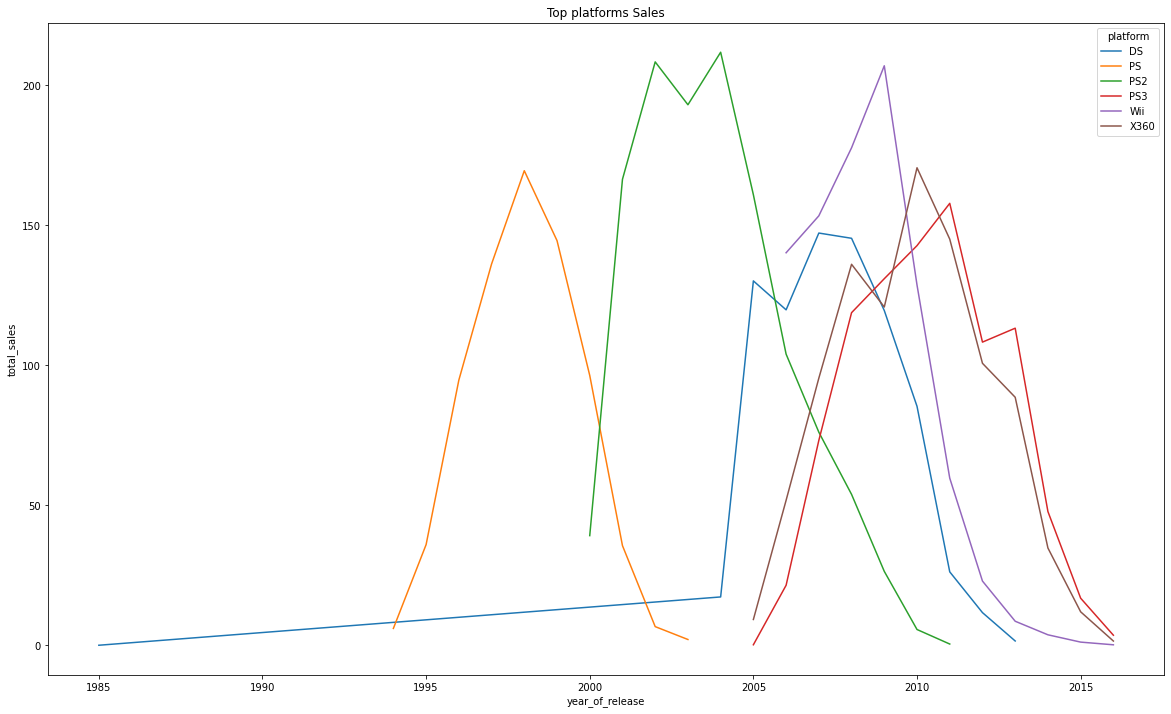

In [48]:
plt.figure(figsize=(20,12))
ax = sb.lineplot(
    data=top_platform_sales, 
    x = 'year_of_release',
    y = 'total_sales',
    hue = 'platform').set(title='Top platforms Sales')

<span style="color:orange">**Conlcusions:** </span> 
- Average lifecycle of the platforms is 8 years. 
- PC has been selling games for over 30 years, followed by DS (28) and GB (13). But the top sales is lead by PS2, Wii & Xbox
- GG, TG16, PCFX did not have any success as they only last less than 1 year


<span style="color:purple">**Next steps:** </span>
- Filter our data to consider games only from 2014 and on. 

### Working only with relevant data. Filter df from 2012 and on.
* *Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.*

* *Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.*

In [49]:
games_2014 = games[games['year_of_release'] >= 2014]
games_2014.sort_values(by='year_of_release', ascending=False)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,duplicate_name,total_sales
10780,Digimon World: Next Order,PSV,2016,Action,0.00,0.00,0.10,0.00,NaN,NaN,unknown,False,0.10
12399,One Piece: Burning Blood,XOne,2016,Fighting,0.03,0.02,0.00,0.01,60.0,5.8,T,True,0.06
11297,SD Gundam G Generation Genesis,PS4,2016,Strategy,0.00,0.00,0.08,0.00,NaN,NaN,unknown,True,0.08
11301,BlazBlue Central Fiction,PS4,2016,Fighting,0.04,0.00,0.03,0.01,85.0,7.6,T,True,0.08
11397,Battleborn,PC,2016,Shooter,0.04,0.04,0.00,0.01,69.0,6.9,T,True,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,Watch Dogs,WiiU,2014,Action,0.07,0.05,0.00,0.01,62.0,6.4,M,True,0.13
9451,The IdolM@ster: One for All,PS3,2014,Misc,0.00,0.00,0.13,0.00,NaN,NaN,unknown,False,0.13
4279,FIFA 15,3DS,2014,Sports,0.09,0.34,0.00,0.03,NaN,2.4,E,True,0.46
9427,Dengeki Bunko Fighting Climax,PSV,2014,Fighting,0.04,0.00,0.08,0.01,75.0,8.5,T,True,0.13


In [50]:
profitable_platforms = pd.pivot_table(games_2014, index = 'year_of_release', columns = 'platform', values = 'total_sales',
                   aggfunc = 'sum', fill_value=0)
profitable_platforms.head()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [51]:
(profitable_platforms - profitable_platforms.shift(+1)).tail()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,-15.98,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


In [52]:
profitable_platforms_t = (profitable_platforms - profitable_platforms.shift(+1)).T
profitable_platforms_t

year_of_release,2014,2015,2016
platform,,,
3DS,NaN,-15.98,-12.64
PC,NaN,-4.76,-3.27
PS3,NaN,-30.94,-13.22
PS4,NaN,18.90,-49.65
PSP,NaN,-0.12,-0.12
PSV,NaN,-5.65,-2.00
Wii,NaN,-2.61,-0.96
WiiU,NaN,-5.68,-11.75
X360,NaN,-22.78,-10.44


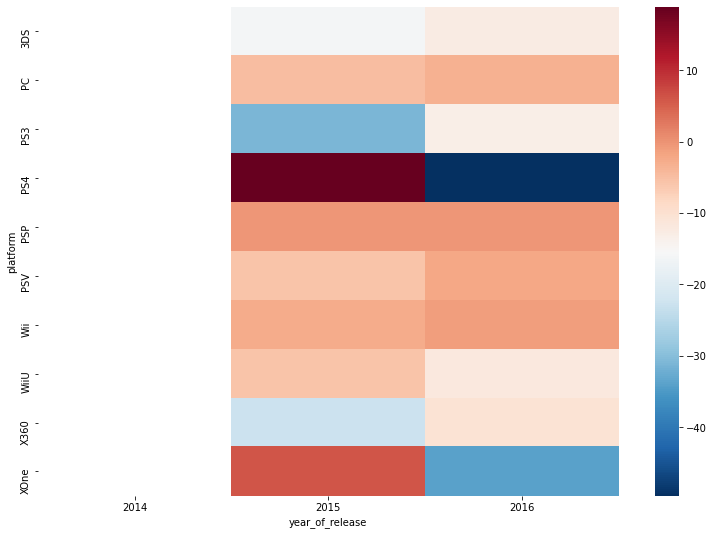

In [53]:
plt.figure(figsize=(13,9))
sb.heatmap(profitable_platforms_t, cmap = 'RdBu_r')
plt.show()

<span style="color:orange">**Conlcusions:** </span> 

From the heatmap above, the two platforms that remained profitable, PSP and Wii, while the others had not. 

In [54]:
games_2014_sales = games_2014.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
games_2014_sales.sort_values('total_sales', ascending=False).head(10)

,platform,year_of_release,total_sales
10,PS4,2015,118.90
9,PS4,2014,100.00
11,PS4,2016,69.25
27,XOne,2015,60.14
26,XOne,2014,54.07
6,PS3,2014,47.76
0,3DS,2014,43.76
23,X360,2014,34.74
1,3DS,2015,27.78
28,XOne,2016,26.15



* *Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.*

In [55]:
grouped= games_2014.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
grouped.sort_values('total_sales', ascending=False).head(10)

,platform,year_of_release,total_sales
10,PS4,2015,118.90
9,PS4,2014,100.00
11,PS4,2016,69.25
27,XOne,2015,60.14
26,XOne,2014,54.07
6,PS3,2014,47.76
0,3DS,2014,43.76
23,X360,2014,34.74
1,3DS,2015,27.78
28,XOne,2016,26.15


In [56]:
grouped_mean= games_2014.groupby(['platform','year_of_release'])['total_sales'].mean().reset_index()
grouped_mean.sort_values('total_sales', ascending=False).head(10)

,platform,year_of_release,total_sales
9,PS4,2014,1.333333
26,XOne,2014,0.886393
10,PS4,2015,0.867883
27,XOne,2015,0.751750
20,WiiU,2014,0.710645
17,Wii,2014,0.625000
21,WiiU,2015,0.583929
23,X360,2014,0.551429
0,3DS,2014,0.547000
6,PS3,2014,0.442222


<span style="color:orange">**Notes:** </span> 
- After taking data only relevant since 2014, we realized the distribution of popular platorms has changed. We can see that now PS2 is not leading sales, but PS3. This is not surprising, as is the next version of a very popular platform, PlayStation. This tells us that besided the version, PlayStation is still leading in sales. 
- Now our distribution is focus on PS4, PS3 and X360 (Xbox) = Monopol of two main companies: PlayStation & XBox


In [57]:
games_2014.describe(include = ['object'])

,name,platform,genre,user_score,rating
count,1689,1689,1689,888,1689
unique,956,10,12,79,5
top,The LEGO Movie Videogame,PS4,Action,7.1,unknown
freq,8,376,619,40,749


<span style="color:orange">**Notes:** </span> 
- Most common game is now FIFA 15
- Most common platform is PS4 (same company, next version platform)
- Most common genre is Action (same as the whole dataset)
- Most common user score is 7.1 
- Most common rating is now unknwon 

In [58]:
missing_values_table(games_2014)

Your selected dataframe has 13 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
critic_score,971,57.5
user_score,801,47.4


<span style="color:orange">**Notes:** </span> 
- We still have a big amount of missing values

In [59]:
games_2014_sales = games_2014.groupby(['platform']).agg({'total_sales':'sum'}).reset_index()
games_2014_sales.sort_values('total_sales', ascending=False).head(10)

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


In [60]:
games_2014_grouped = games_2014.groupby(['platform']).agg({'total_sales':['min', 'max', 'count']}).droplevel(0, axis=1).reset_index()
games_2014_grouped['total_sales'] = games_2014_sales['total_sales']
games_2014_grouped.sort_values('count', ascending=False).head(10)

,platform,min,max,count,total_sales
3,PS4,0.01,14.63,376,288.15
5,PSV,0.01,1.96,295,22.40
9,XOne,0.01,7.39,228,140.36
2,PS3,0.01,5.27,219,68.18
0,3DS,0.01,11.68,212,86.68
1,PC,0.01,3.05,151,27.05
8,X360,0.01,4.28,111,48.22
7,WiiU,0.01,7.09,73,42.98
4,PSP,0.01,0.09,13,0.36
6,Wii,0.01,2.01,11,5.07


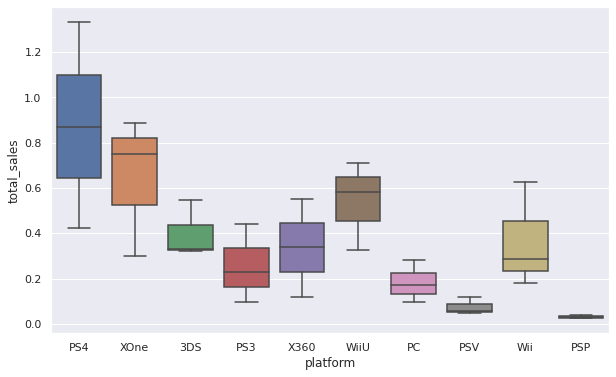

In [61]:
#boxplot for the global sales of all games, broken down by platform. 
boxplot_data = games_2014.groupby(['platform', 'name'])['total_sales'].mean().reset_index()
order = boxplot_data.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)['platform']

sb.set(rc={'figure.figsize':(10,6)})
sb.boxplot(x='platform',y='total_sales',data=grouped_mean, order=order, showfliers = False);

- PS4 has more sales, but the aveerage on XOne is higher


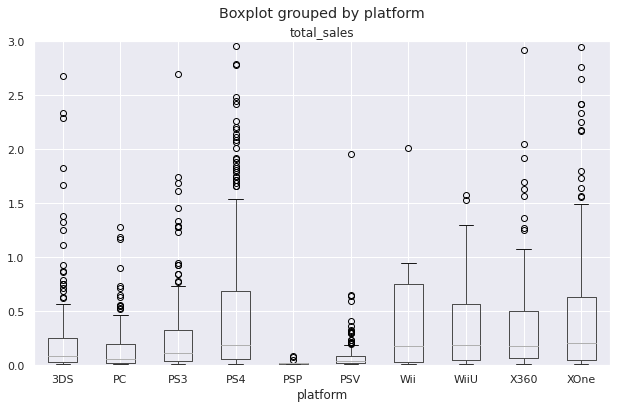

In [62]:
# Reviewer's code

games_2014.boxplot(column='total_sales', by='platform')

plt.ylim(0,3);

### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

- Selected platform: PS4

In [63]:
PS4_sales = games_2014[(games_2014['platform'] == 'PS4') & (games_2014['critic_score'].notna())][['total_sales', 'critic_score']]
PS4_sales.corr()

,total_sales,critic_score
total_sales,1.000000,0.402661
critic_score,0.402661,1.000000


In [64]:
def sales_score_effect (platform, score_type):
    PS4_data = games_2014[games_2014['platform'] == platform][[score_type, 'total_sales']]
    
    if score_type == 'user_score':
        PS4_data['user_score'] = np.floor(pd.to_numeric(PS4_data['user_score'], errors='coerce')).astype(float)
    
    
    #Building a scatter-plot and hexbin plot
    PS4_data.plot(x= score_type, y= 'total_sales', kind= 'scatter', figsize= (10,8),
                  color = 'green', title= 'Scatter-plot' )
    
    plt.xlabel('Score')
    plt.ylabel('Total Sales')
    
    PS4_data.plot(x= score_type, y= 'total_sales', kind= 'hexbin', figsize= (10,8),
                  color = 'green', sharex = False, gridsize = 15, title= 'Hexbin-plot')
    
    plt.xlabel('Score')
    plt.ylabel('Total Sales')
    
    plt.show()
    
     #Finding the correlation between the parameters
    corr= PS4_data[score_type].corr(PS4_data['total_sales'])
    
    if score_type == 'user_score':
        score_type = 'user reviews'
    else:
        score_type = 'professional reviews'
        
    
    if corr > 0.7:
        print('Positive correlation between', score_type, 'and', platform, 'revenues.')
    else:
        print('🚩Weak correlation between', score_type, 'and', platform, 'revenues.')
        print()
    

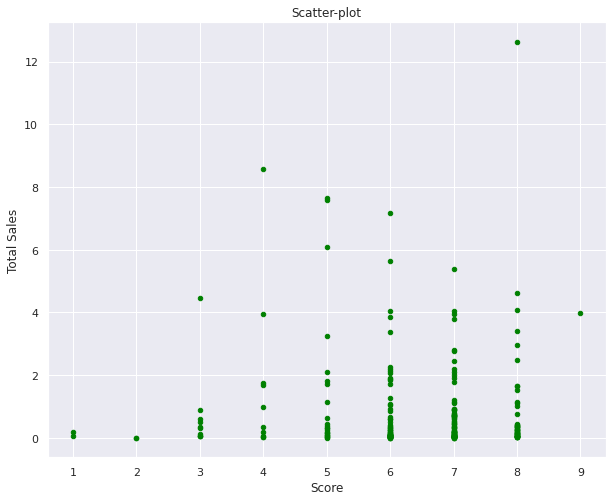

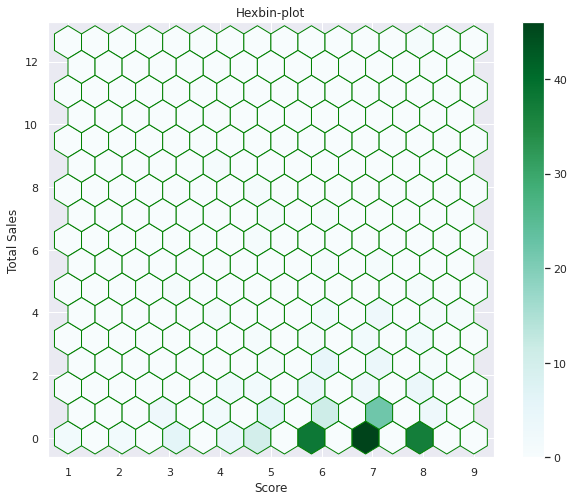

🚩Weak correlation between user reviews and PS4 revenues.



In [65]:
sales_score_effect ('PS4', 'user_score')


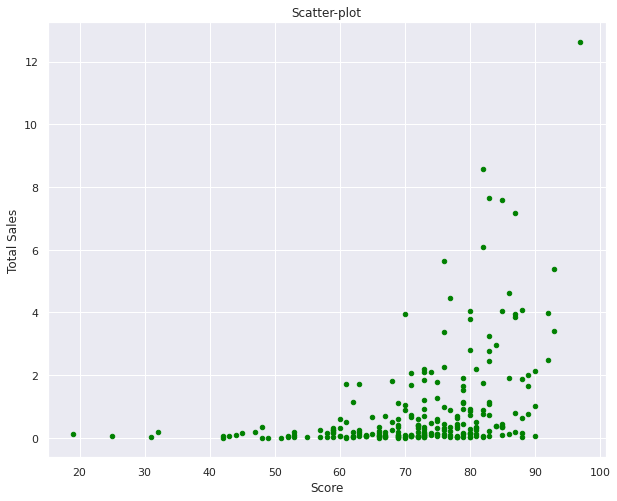

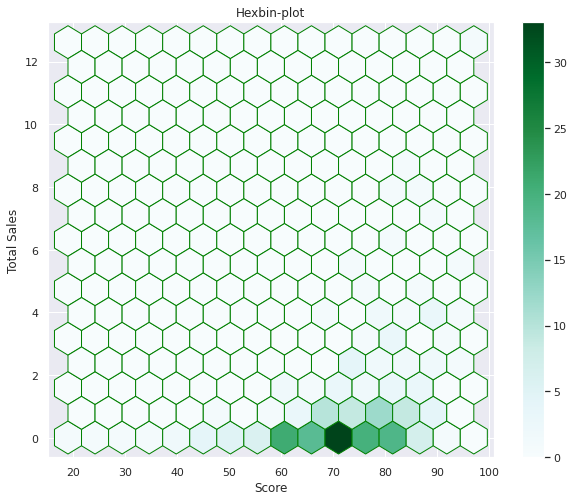

🚩Weak correlation between professional reviews and PS4 revenues.



In [66]:
sales_score_effect ('PS4', 'critic_score')

<span style="color:orange">**Conlcusions:** </span> 
- Low correlation between user_score & sales
- Low correlation between critic_score & sales


#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.


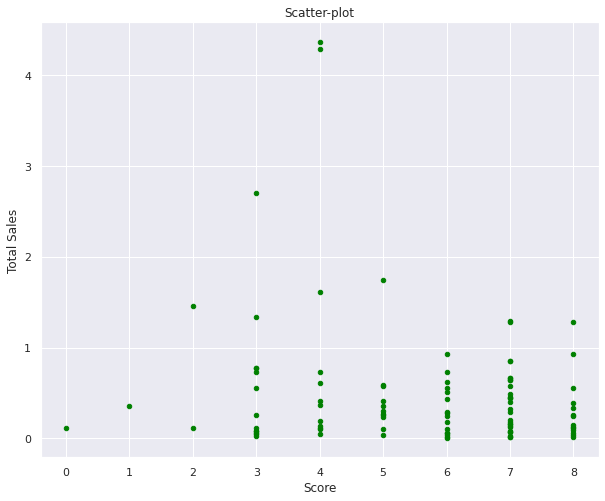

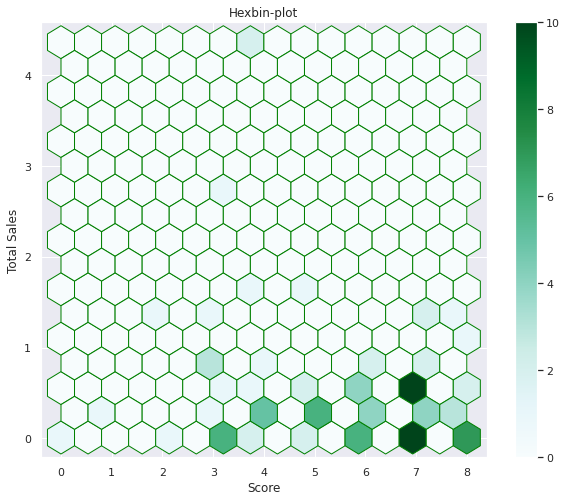

🚩Weak correlation between user reviews and PS3 revenues.



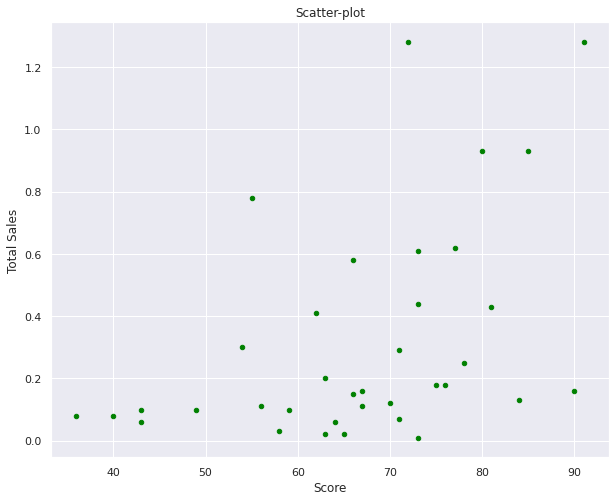

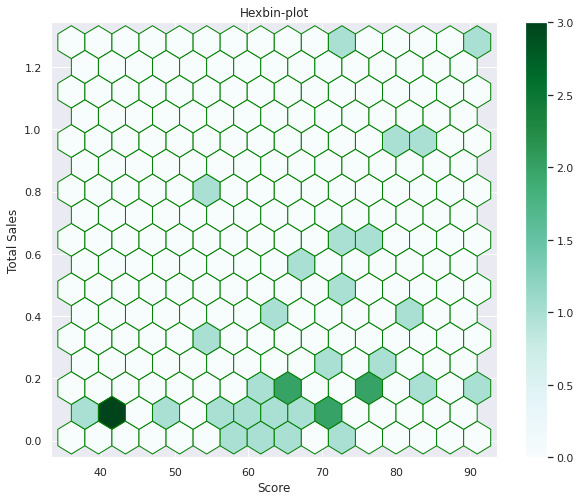

🚩Weak correlation between professional reviews and PS3 revenues.



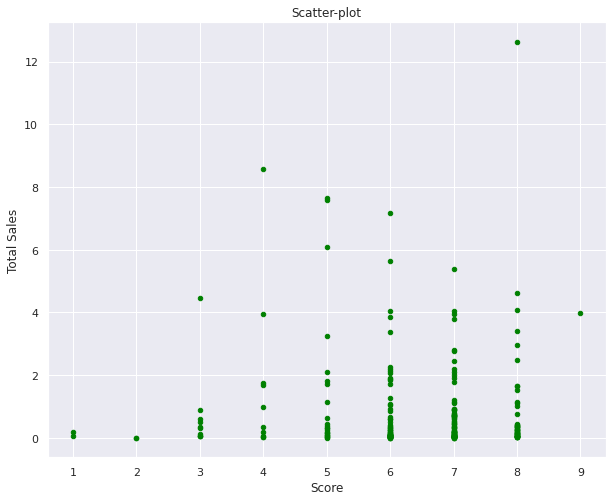

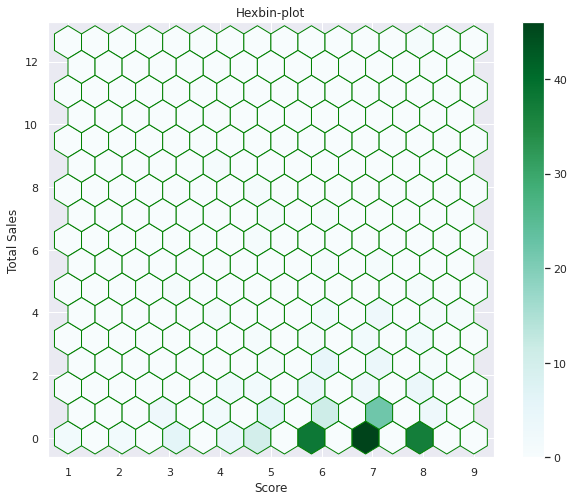

🚩Weak correlation between user reviews and PS4 revenues.



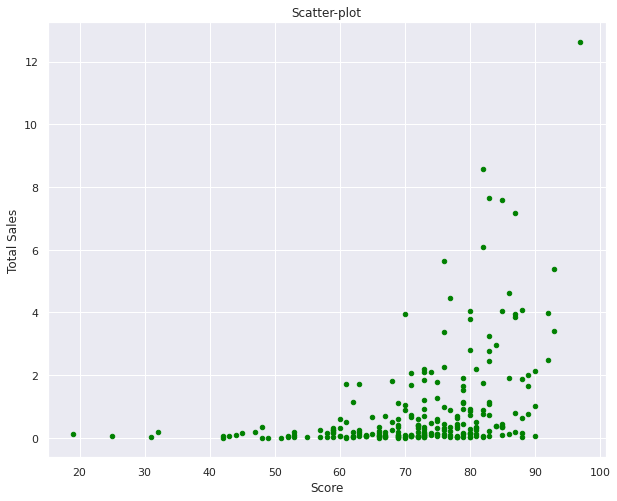

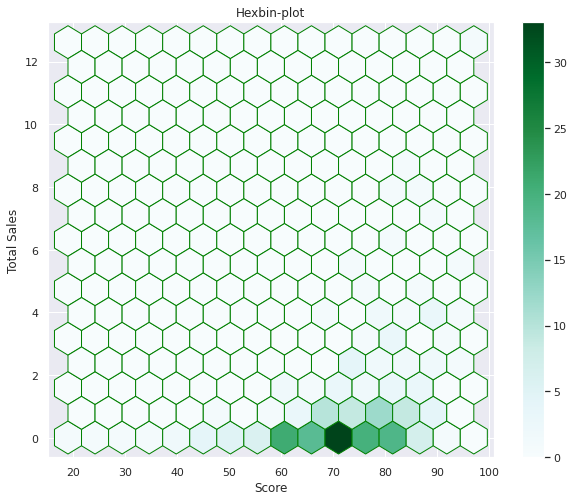

🚩Weak correlation between professional reviews and PS4 revenues.



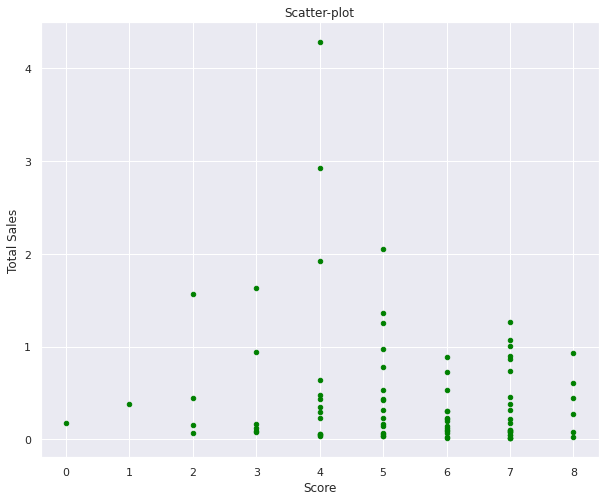

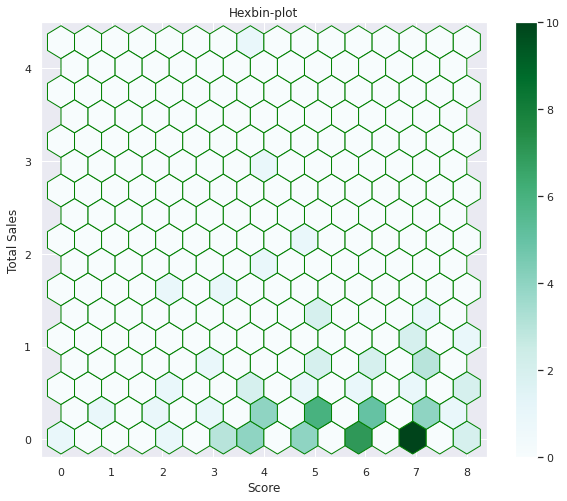

🚩Weak correlation between user reviews and X360 revenues.



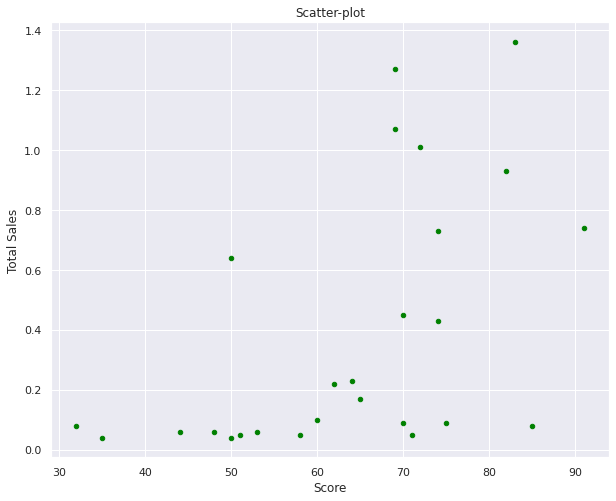

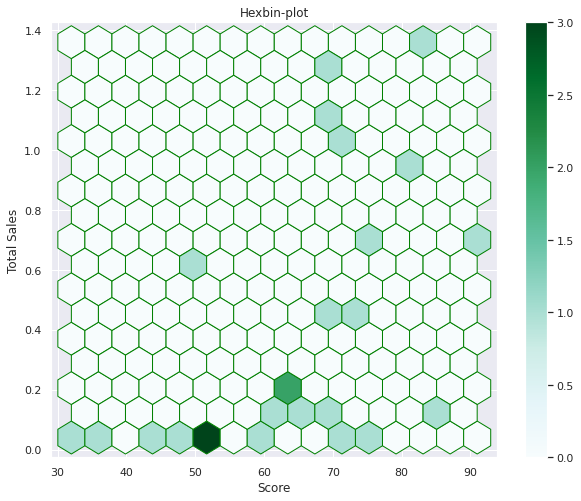

🚩Weak correlation between professional reviews and X360 revenues.



In [67]:
top_platforms_2014 = ['PS3', 'PS4', 'X360']

critics= ['user_score', 'critic_score']

for platform in top_platforms_2014:
    for critic in critics:
        sales_score_effect (platform, critic)
    

<span style="color:orange">**Conlcusions:** </span> 
- Same as in PS4, the correlation between the reviews and the revenue is weak on the most popular platforms. 
- As the companies, they should not worry much on bad reviews, as we see is not affecting the total_sales, which is something pretty surprising, as in many business, bad reviews have a big impact on sales

### Take a look at the general distribution of games by genre. 
- *What can we say about the most profitable genres? Can you generalize about genres with high and low sales?*

In [68]:
#Profitable genres by total_sales
game_genre = games_2014[['genre', 'total_sales']]
grouped_game_genre= game_genre.groupby('genre').sum().sort_values(by='total_sales').reset_index()
grouped_game_genre.sort_values('total_sales', ascending=False).head()

,genre,total_sales
11,Action,199.36
10,Shooter,170.94
9,Sports,109.48
8,Role-Playing,101.44
7,Misc,37.55


In [69]:
grouped_game_genre.sort_values('total_sales', ascending=False).tail()

,genre,total_sales
4,Platform,18.09
3,Adventure,17.55
2,Simulation,13.13
1,Strategy,3.96
0,Puzzle,2.21


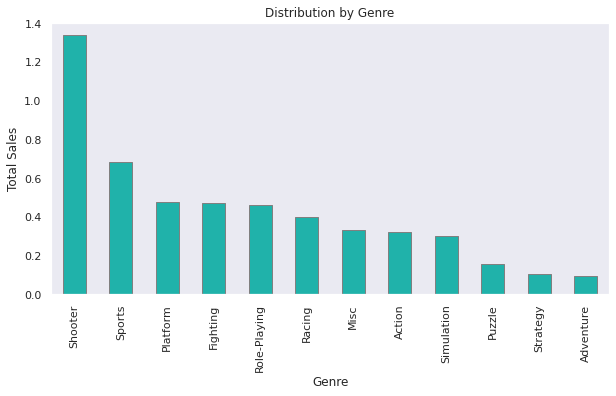

In [70]:
game_genre = games_2014[games_2014['year_of_release']>=2014]
game_genre = game_genre.groupby(['genre'])['total_sales'].mean().sort_values(ascending=False)
game_genre.plot(kind='bar', title= 'Distribution by Genre', xlabel= 'Genre', ylabel= 'Total Sales', figsize=(10,5), color='lightseagreen',edgecolor = "gray", grid=False);


<span style="color:orange">**Conlcusions:** </span> 
- The most profitable games are Shooter, Action Role-Playing and Sports, even looking at the average sales. But we see the Shooter games are above
- The least profitable are Puzzles, Strategy, & Adventure.


## Create a user profile for each region

- For each region (NA, EU, JP), determine:
    - The top five platforms. Describe variations in their market shares from region to region.
    - The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

#### Top 5 Platforms per sales per region

In [71]:
#North America top 5 platform
NA_sales = games_2014.pivot_table(index='platform', values='na_sales', aggfunc=['sum']).reset_index()
NA_sales.columns = ['platform','total_na_sales']
NA_sales['market_share'] = NA_sales['total_na_sales']/(NA_sales['total_na_sales']).sum()
NA_sales = NA_sales.sort_values(by='total_na_sales', ascending=False).reset_index(drop=True)

sales_others = NA_sales.loc[5:,'total_na_sales'].sum()
market_share_others = NA_sales.loc[5:,'market_share'].sum()

NA_sales = NA_sales[0:5].append({'platform':'others', 'total_na_sales':sales_others, 'market_share':market_share_others}, ignore_index=True)
                                 

In [72]:
NA_sales.head(6)  

,platform,total_na_sales,market_share
0,PS4,98.61,0.347145
1,XOne,81.27,0.286102
2,X360,28.30,0.099627
3,3DS,22.64,0.079701
4,PS3,22.05,0.077624
5,others,31.19,0.109801


In [73]:
#Europe top 5 platform
EU_sales = games_2014.pivot_table(index='platform', values='eu_sales', aggfunc=['sum']).reset_index()
EU_sales.columns = ['platform','total_eu_sales']
EU_sales['market_share'] = EU_sales['total_eu_sales']/(EU_sales['total_eu_sales']).sum()
EU_sales= EU_sales.sort_values(by='total_eu_sales', ascending=False).reset_index(drop=True)

sales_others = EU_sales.loc[5:,'total_eu_sales'].sum()
market_share_others = EU_sales.loc[5:,'market_share'].sum()

EU_sales = EU_sales[0:5].append({'platform':'others', 'total_eu_sales':sales_others, 'market_share':market_share_others}, ignore_index=True)
                                 

In [74]:
EU_sales.head(6)  

,platform,total_eu_sales,market_share
0,PS4,130.04,0.480420
1,XOne,46.25,0.170866
2,PS3,25.54,0.094355
3,PC,17.97,0.066388
4,3DS,16.12,0.059554
5,others,34.76,0.128417


In [75]:
#Japan top 5 platform
JP_sales = games_2014.pivot_table(index='platform', values='jp_sales', aggfunc=['sum']).reset_index()
JP_sales.columns = ['platform','total_jp_sales']
JP_sales['market_share'] = JP_sales['total_jp_sales']/(JP_sales['total_jp_sales']).sum()
JP_sales= JP_sales.sort_values(by='total_jp_sales', ascending=False).reset_index(drop=True)

sales_others = JP_sales.loc[5:,'total_jp_sales'].sum()
market_share_others = JP_sales.loc[5:,'market_share'].sum()

JP_sales = JP_sales[0:5].append({'platform':'others', 'total_jp_sales':sales_others, 'market_share':market_share_others}, ignore_index=True)
                                 

In [76]:
JP_sales.head(6)  

,platform,total_jp_sales,market_share
0,3DS,44.24,0.475239
1,PS4,15.02,0.161349
2,PSV,14.54,0.156193
3,PS3,11.22,0.120529
4,WiiU,7.31,0.078526
5,others,0.76,0.008164


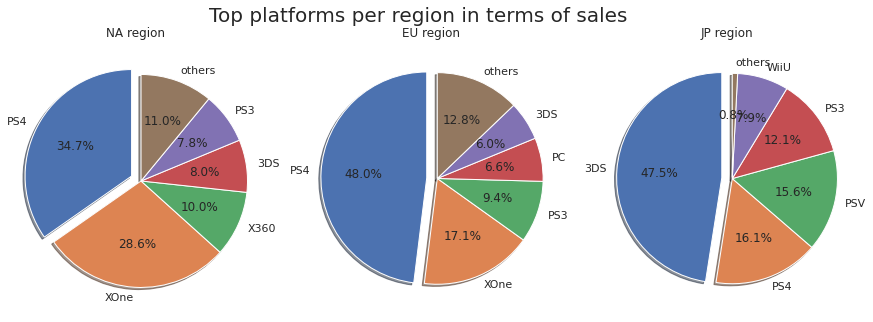

In [77]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) #ax1,ax2,ax3 refer to our 3 pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

fig.suptitle('Top platforms per region in terms of sales', fontsize=20)



labels = NA_sales['platform']
sizes = NA_sales['market_share']
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1st slice

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',normalize=True,
        shadow=True, startangle=90)
ax1.axis('equal')  #pie is drawn as a circle.
ax1.set_title('NA region');


labels = EU_sales['platform']
sizes = EU_sales['market_share']
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1st slice

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',normalize=True,
        shadow=True, startangle=90)
ax2.axis('equal');  #pie is drawn as a circle.
ax2.set_title('EU region')


labels = JP_sales['platform']
sizes = JP_sales['market_share']
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1st slice

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',normalize=True,
        shadow=True, startangle=90)
ax3.axis('equal');  #pie is drawn as a circle.
ax3.set_title('JP region');


<span style="color:orange">**Conlcusions:** </span> 

- **NA region:** PS4 and XOne, the most common platforms, but we could consider together XOne and X360 as XBox company, since we can see a clear division between PlayStation users vs. XBox users. 
    
- **EU region:** Same as in NA but even more market share por PS4

- **JP region:** 3DS is the most common platform with almost 50% of the sales, leaving PS4 as second place. X360 has no presence in JP markets
    

#### Top 5 `genres` per region

In [78]:
#Top 5 genres North America
NA_genre = games_2014.pivot_table(index='genre', values='na_sales', aggfunc=['sum']).reset_index()
NA_genre.columns = ['genre','total_na_sales']
NA_genre['market_share'] = NA_genre['total_na_sales']/(NA_genre['total_na_sales']).sum()
NA_genre = NA_genre.sort_values(by='total_na_sales', ascending=False).reset_index(drop=True)

sales_others = NA_genre.loc[5:,'total_na_sales'].sum()
market_share_others = NA_genre.loc[5:,'market_share'].sum()

NA_genre = NA_genre[0:5].append({'genre':'others', 'total_na_sales':sales_others, 'market_share':market_share_others}, ignore_index=True)

In [79]:
NA_genre.head()

,genre,total_na_sales,market_share
0,Shooter,79.02,0.278181
1,Action,72.53,0.255333
2,Sports,46.13,0.162395
3,Role-Playing,33.47,0.117827
4,Misc,15.05,0.052982


In [80]:
#Top 5 genres EuropaEU
EU_genre = games_2014.pivot_table(index='genre', values='eu_sales', aggfunc=['sum']).reset_index()
EU_genre.columns = ['genre','total_eu_sales']
EU_genre['market_share'] = EU_genre['total_eu_sales']/(EU_genre['total_eu_sales']).sum()
EU_genre = EU_genre.sort_values(by='total_eu_sales', ascending=False).reset_index(drop=True)

sales_others = EU_sales.loc[5:,'total_eu_sales'].sum()
market_share_others =EU_sales.loc[5:,'market_share'].sum()

EU_genre = EU_genre[0:5].append({'genre':'others', 'total_eu_sales':sales_others, 'market_share':market_share_others}, ignore_index=True)

In [81]:
EU_genre.head()

,genre,total_eu_sales,market_share
0,Action,74.68,0.275898
1,Shooter,65.52,0.242057
2,Sports,45.73,0.168945
3,Role-Playing,28.17,0.104071
4,Racing,14.13,0.052202


In [82]:
#Top 5 genres Japan
JP_genre = games_2014.pivot_table(index='genre', values='jp_sales', aggfunc=['sum']).reset_index()
JP_genre.columns = ['genre','total_jp_sales']
JP_genre['market_share'] = JP_genre['total_jp_sales']/(JP_genre['total_jp_sales']).sum()
JP_genre = JP_genre.sort_values(by='total_jp_sales', ascending=False).reset_index(drop=True)

sales_others = JP_sales.loc[5:,'total_jp_sales'].sum()
market_share_others =JP_sales.loc[5:,'market_share'].sum()

JP_genre = JP_genre[0:5].append({'genre':'others', 'total_jp_sales':sales_others, 'market_share':market_share_others}, ignore_index=True)

In [83]:
JP_genre.head()

,genre,total_jp_sales,market_share
0,Role-Playing,31.16,0.334730
1,Action,29.58,0.317757
2,Fighting,6.37,0.068428
3,Misc,5.61,0.060264
4,Shooter,4.87,0.052315


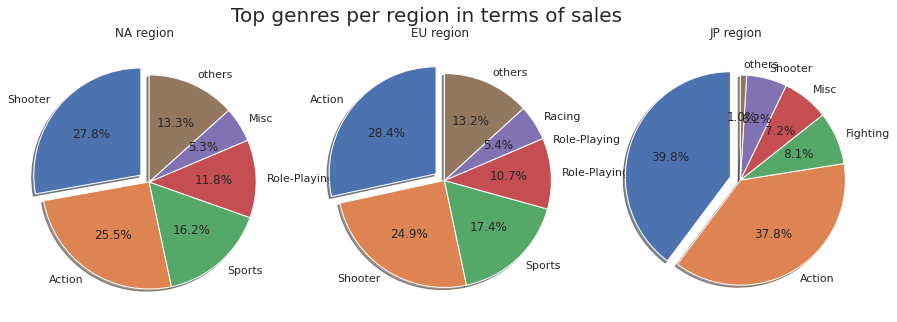

In [84]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) #ax1,ax2,ax3 refer to our 3 pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

fig.suptitle('Top genres per region in terms of sales', fontsize=20)



labels = NA_genre['genre']
sizes = NA_genre['market_share']
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1st slice

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',normalize=True,
        shadow=True, startangle=90)
ax1.axis('equal')  # pie is drawn as a circle.
ax1.set_title('NA region');


labels = EU_genre['genre']
sizes = EU_genre['market_share']
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1st slice

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',normalize=True,
        shadow=True, startangle=90)
ax2.axis('equal');  # pie is drawn as a circle.
ax2.set_title('EU region')


labels = JP_genre['genre']
sizes = JP_genre['market_share']
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1st slice

ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',normalize=True,
        shadow=True, startangle=90)
ax3.axis('equal');  # pie is drawn as a circle.
ax3.set_title('JP region');

<span style="color:orange">**Conlcusions:** </span> 

- **NA region & EU region:** both share a very similar distribution, being Shooter and Action the main genres. 

- **JP region:** This distribution changes on JP region, as Role-playing is a clear winner, followed by Action genre. this makes sense as many 3DS platform games are Role-playing games

#### ESRB Rating effect on sales per region

In [85]:
#ESRB rating North America
NA_rating = games_2014.pivot_table(index='rating', values='na_sales', aggfunc=['sum']).reset_index()
NA_rating.columns = ['rating','total_na_sales']
NA_rating['market_share'] = NA_rating['total_na_sales']/(NA_rating['total_na_sales']).sum()
NA_rating = NA_rating.sort_values(by='total_na_sales', ascending=False).reset_index(drop=True)

sales_others = NA_rating.loc[4:,'total_na_sales'].sum()
market_share_others = NA_rating.loc[4:,'market_share'].sum()

NA_rating = NA_rating[0:4].append({'rating':'others', 'total_na_sales':sales_others, 'market_share':market_share_others}, ignore_index=True)

In [86]:
NA_rating.sort_values('rating', ascending=True).head()

,rating,total_na_sales,market_share
2,E,50.74,0.178624
0,M,96.42,0.339435
3,T,38.95,0.137119
4,others,33.23,0.116982
1,unknown,64.72,0.227839


In [87]:
#ESRB rating EU
EU_rating = games_2014.pivot_table(index='rating', values='eu_sales', aggfunc=['sum']).reset_index()
EU_rating.columns = ['rating','total_eu_sales']
EU_rating['market_share'] = EU_rating['total_eu_sales']/(EU_rating['total_eu_sales']).sum()
EU_rating = EU_rating.sort_values(by='total_eu_sales', ascending=False).reset_index(drop=True)

sales_others = EU_rating.loc[5:,'total_eu_sales'].sum()
market_share_others =EU_rating.loc[5:,'market_share'].sum()

EU_rating = EU_rating[0:5].append({'rating':'others', 'total_eu_sales':sales_others, 'market_share':market_share_others}, ignore_index=True)

In [88]:
EU_rating.sort_values('rating', ascending=True).head(6)

,rating,total_eu_sales,market_share
2,E,58.06,0.214497
4,E10+,26.16,0.096645
0,M,93.44,0.345205
3,T,34.07,0.125868
5,others,0.00,0.000000
1,unknown,58.95,0.217785


In [89]:
#ESRB rating JP
JP_rating = games_2014.pivot_table(index='rating', values='jp_sales', aggfunc=['sum']).reset_index()
JP_rating.columns = ['rating','total_jp_sales']
JP_rating['market_share'] = JP_rating['total_jp_sales']/(JP_rating['total_jp_sales']).sum()
JP_rating = JP_rating.sort_values(by='total_jp_sales', ascending=False).reset_index(drop=True)

sales_others = JP_rating.loc[5:,'total_jp_sales'].sum()
market_share_others =JP_rating.loc[5:,'market_share'].sum()

JP_rating = JP_rating[0:5].append({'rating':'others', 'total_jp_sales':sales_others, 'market_share':market_share_others}, ignore_index=True)

In [90]:
JP_rating.sort_values('rating', ascending=True).head(8)

,rating,total_jp_sales,market_share
2,E,8.94,0.096036
4,E10+,4.46,0.047911
3,M,8.01,0.086046
1,T,14.78,0.158771
5,others,0.00,0.000000
0,unknown,56.90,0.611236


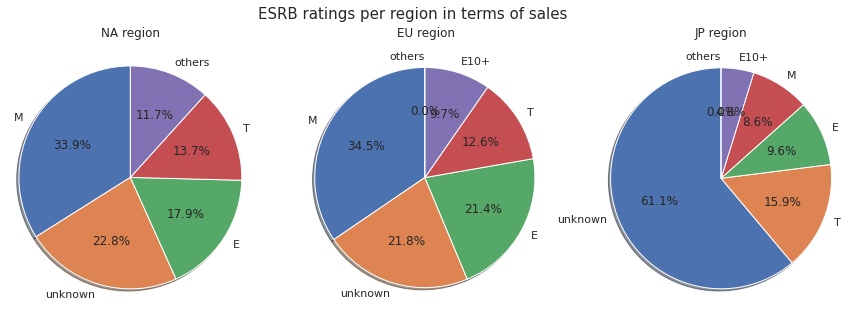

In [91]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) #ax1,ax2,ax3 refer to our 3 pies
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

fig.suptitle('ESRB ratings per region in terms of sales', fontsize=15)


labels = NA_rating['rating']
sizes = NA_rating['market_share']
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice

ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',normalize=True,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('NA region');


labels = EU_rating['rating']
sizes = EU_rating['market_share']
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice

ax2.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',normalize=True,
        shadow=True, startangle=90)
ax2.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('EU region')


labels = JP_rating['rating']
sizes = JP_rating['market_share']
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice

ax3.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',normalize=True,
        shadow=True, startangle=90)
ax3.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('JP region');


1. **Rating Pending (RP)** | 1994–present |  
    
2. **Everyone (E)** | **1994–1998 (as K-A), 1998–present (as E)**    
    
3. **Everyone 10+ (E10+)** | 2005–present | 
   
4. **Teen (T)** | 1994–present |     
    
5. **Mature 17+ (M)** | 1994–present |   
    
6. **Adults Only 18+ (AO)** | 1994–present |
    
7. **Early Childhood (EC)** | 1994–2018 | 


<span style="color:orange">**Conlcusions:** </span>
- In both North America and Europe the distribution of ratings are very similar
- Japan has the biggest difference, where we have an unknown category and then Category E (Everyone) , along with T (Teen), M(Mature) 
    - We can see that ESRB rated games are much less common in Japan

**User profile on each region will have the following characteristics:**

* NA region: either young adults (+18) or adults playing mostly action games on the "X360" platform;
* EU region: either young adults (+18) or adults playingg mostly action games on the "PS4" platform;
* JP region: users from undefined age playing mostly role-playing games on the "3DS" platform.

## Test the following hypotheses:

- **Hipothesis 1:** Average user ratings of the Xbox One and PC platforms are the same.
- **Hipothesis 2:** Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.

Explain:
- How you formulated the null and alternative hypotheses
- What significance level you chose to test the hypotheses, and why

<span style="color:purple">**Next steps:** </span>
- Build function to test the hipothesis. Will check if variance of the two samples is the same. 
- **Alpha**: 0.05 as it standard

In [92]:
def t_test(sample_1,sample_2,alpha= 0.05):
    
    stat, p = levene (sample_1, sample_2)
    
    if p < alpha:
        option_var=False
    else:
        option_var=True
        
    p_value=st.ttest_ind(sample_1, sample_2, nan_policy = 'omit', equal_var=option_var).pvalue
    print(p_value)
    
    if p_value < alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: Not enough evidence to say that averages of sample 1 & 2 are not the same") 

####  **Hipothesis 1:** Average user ratings of the Xbox One and PC platforms are the same.

* H0: The average user ratings of the Xbox One and PC platforms are the same
* H1: The average user ratings of the Xbox One and PC platforms are differ

Samples: 
- User ratings of the Xbox One
- User ratings of PC

In [93]:
sample_1 = games_2014[games_2014['platform'] == 'XOne']['user_score']
sample_1 = np.floor(pd.to_numeric(sample_1, errors='coerce')).astype(float)

sample_2= games_2014[games_2014['platform'] == 'PC']['user_score']
sample_2 = np.floor(pd.to_numeric(sample_2, errors='coerce')).astype(float)

In [94]:
t_test(sample_1,sample_2,alpha= 0.05)

0.040304953182701546
Reject H0: average of sample 1 is not equal to average of sample 2


####  **Hipothesis 2:** Average user ratings for the Action and Sports genres are different.

* H0: The average user ratings for the Action and Sports genres are the same
* H1: The average user ratings for the Action and Sports genres are the differ

Samples: 
- User ratings for the Action genre
- User ratings for the sports genre

In [95]:
sample_1 = games_2014[games_2014['genre'] == 'Action']['user_score']
sample_1 = np.floor(pd.to_numeric(sample_1, errors='coerce')).astype(float)

sample_2= games_2014[games_2014['genre'] == 'Sports']['user_score']
sample_2 = np.floor(pd.to_numeric(sample_2, errors='coerce')).astype(float)

In [96]:
t_test(sample_1,sample_2,alpha= 0.05)


2.1299562188426512e-17
Reject H0: average of sample 1 is not equal to average of sample 2


<span style="color:orange">**Conlcusions:** </span> 

- Rejected H0 in both cases. We don't accept the first hipothesis (Average user ratings of the Xbox One and PC platforms are the same) and we cannot accept the second one (Average user ratings for the Action and Sports genres are different)



## Overall conclusion

This report analyzes video games player's behavior to provide patters and understand sales distribution. 
We look to prove 2 main hipothesis:
1. Average user ratings of the Xbox One and PC platforms are the same.
1. Average user ratings for the Action and Sports genres are different


<span style="color:purple">**Steps taken:** </span>

- We got familiar with the data and converted column names to lowe case, checking all columns have the correct data types
- Checked for duplicates > not found
- Checked for missing values. After fill the possible ones, we still had a big % of them in three of the columns critic score, rating, user score. We kept them as they are. 
- Calculated total sales for all regions


**General lines conclusions**:
- 2009 is the year with the highest amount of games released, very close is 2008
- Not all the data is relevant, as very few games were released during the period 1980-1993, comparing with more recent years
- From 1994 the numbers start to increase, getting to the peak between 2008-2009
- Since we want to predict sales for 2017, we will consider the sata from year 2014, to avoid the peak years before that might affect our conclusions. Go too far back in time makes no sense, as games change & improve pretty fast. Five years time is the appropiate amount of years to create a good prediction

- There are 5 platforms that stand out in terms of total sales in all regions: 'PS4', 'PS3', 'X360', '3DS', 'XOne';
- Lifetime of platforms is aoround 8-10 years, with some exceptions
- There is almost no signigicant connection between sales and user reviews and weak connection between game sales and professional reviews for the 'PS4' platform.

- We cleaned the data to focus on games released from 2014 and on. We saw there's a monopol of two main companies: PlayStation & XBox, PS in several versions

**Genres:**
- The most profitable games are Action, Shooter, Role-Playing and Sports
- The least profitable are Puzzles, Strategy, Adventure & Simulation.


**Analysis per region:**

**Top Platform**
   - NA region: X360 is the most common platform, followed by PS4
   - EU region: PS4 is the most common platform, followed by PS3, leaving X360 on third place
   - JP region: DS is the most common platform with almost 50% of the sales, leaving PS3 as second place (not even the last model of PlayStation, PS4). X360 has no presence in JP markets
    
**Top Genres**:
   - NA region & EU region: both share a very similar distribution, being action the main genre followed by Shooter
   - JP region: This distribution changes on JP region, as Role-playing is a clear winner, followed by Action genre
    
    
**ESBR Rating effect on sales**:
    - In both North America and Europe the distribution of ratings are very similar
    - Japan has the biggest difference, where we have an unknown category and then Category E (Everyone) , along with T (Teen), M(Mature), so ESBR rating does not have effect on sales in Japan 

We concluded that a User profile on each region will have the following characteristics:

- NA region: either young adults (+18) or adults playing mostly action games on the "X360" platform;
- EU region: either young adults (+18) or adults playingg mostly action games on the "PS4" platform;
- JP region: users from undefined age playing mostly role-playing games on the "3DS" platform.


**Hipothesis**
- Average user ratings of the 'Xbox One' and 'PC' platforms are the same.
- Average user ratings for the Action and Sports genres are the same.